In [1]:
# для математических функций и поддержки быстрых вычислений
import numpy as np
# комплекснозначные аналоги функций
from numpy import log, sqrt
from numpy import exp, linspace, fft, array, arange, pi
# средство рисования
import matplotlib.pyplot as plt

In [2]:
def make_rad_fft(f_x, d):
    '''
    Вычисляет преобразование Фурье без двух "пи" в показателе экспоненты
    
    Параметры:
    
    f_x - массив значений функции, задаваемый "как есть", без особенностей хранения
    и определённый на диапазоне [-M*dx/2, M*dx/2] в M = 2**N равноудалённых точках, без последней.
    
    d = dx - желаемый шаг по переменной x
    
    Области определения:
    
    xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)
    '''
    dx = d
    M = len(f_x)
    
    sign_change_k = np.array([(-1)**k for k in range(0, M)])
    sign_change_l = np.array([(-1)**l for l in range(0, M)])
    #учитываем порядок хранения
    sign_change_l = fft.fftshift(sign_change_l)

    f = sign_change_k * f_x
    f_hat = dx * sign_change_l * fft.fft(f)
    
    # избегаем особенностей хранения результатов fft, нам они не нужны.
    return f_hat

def make_rad_ifft(f_hat_xi, d):
    '''
    Вычисляет обратное преобразование Фурье без двух "пи" в показателе экспоненты
    
    Параметры:
    
    f_xi - массив значений функции, задаваемый "как есть", без особенностей хранения
    и определённый на диапазоне [-pi/d, pi/d] в M = 2**N равноудалённых точках, без последней.
    
    d = dx - желаемый шаг по переменной x, после того, как ifft отработает
    
    Области определения:
    
    xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)

    '''
    dx = d
    M = len(f_hat_xi)

    sign_change_k = np.array([(-1)**k for k in range(0, M)])
    sign_change_l = np.array([(-1)**l for l in range(0, M)])

    f =  (1/(dx)) * sign_change_k * fft.ifft(sign_change_l * f_hat_xi)
    return f

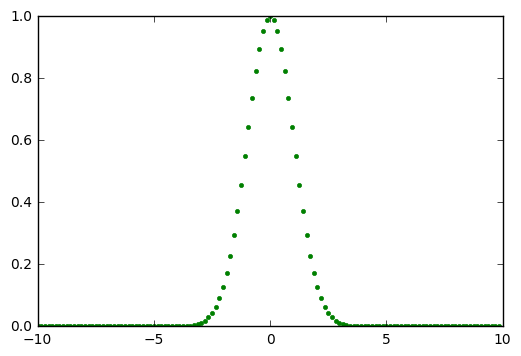

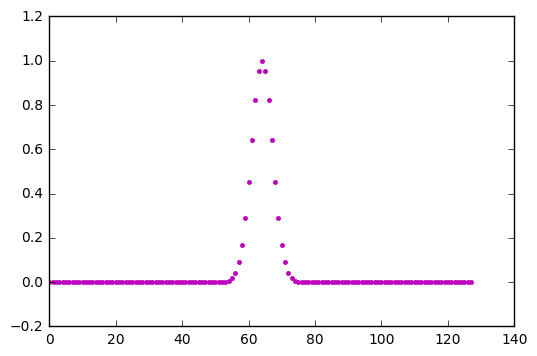

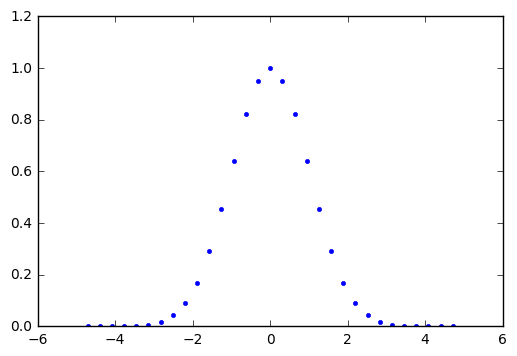

In [7]:
M = 2**7
dx = 20/M

x_space = np.linspace( -(M*dx)/2, (M*dx)/2, num = M, endpoint = False)
xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    
#инвариант для преобразований без двух пи
f = np.exp(-(x_space * x_space)/2)

plt.plot(x_space, f, 'g.')
plt.show()

f_hat= (1/(sqrt(2*pi))) * make_rad_fft(f, dx)
# Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# чтобы сравнение картинок получилось наглядным
# Мы не использовали сдвиг ответа, но это то, что нужно сделать, если потом нужно применять не ifft

plt.plot(f_hat.real, 'm.')
plt.show()

plt.plot(xi_space[(xi_space>-5) & (xi_space<5)], f_hat.real[(xi_space>-5) & (xi_space<5)], 'b.')
plt.show()

# мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
# plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f_hat.imag[(xi_space>-10) & (xi_space<10)], 'r.')
# plt.show()

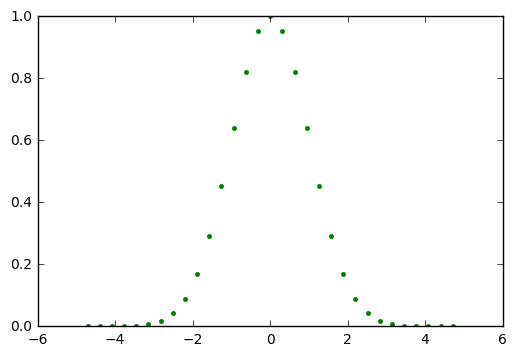

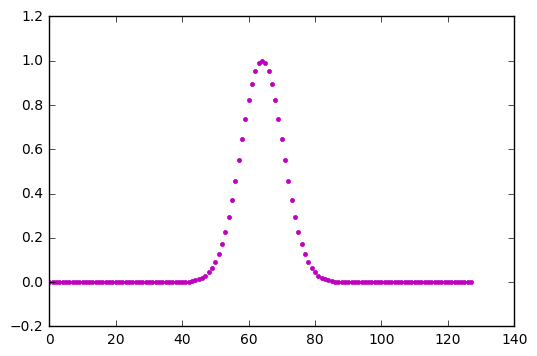

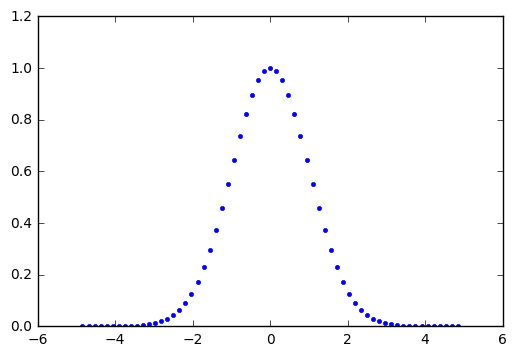

In [8]:
M = 2**7
dx = 20/M

xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
x_space = np.linspace( -(M*dx)/2, (M*dx)/2, num = M, endpoint = False)

#инвариант для преобразований без двух пи
f = np.exp(-(xi_space * xi_space)/2)

plt.plot(xi_space[(xi_space>-5) & (xi_space<5)], f[(xi_space>-5) & (xi_space<5)], 'g.')
plt.show()

f1 = make_rad_ifft(f, dx)

f1 = 2* pi * (1/sqrt(2*pi)) * f1

# Рисуем только те же значения xi, для которых мы определяли функцию по x, 
# чтобы сравнение картинок получилось наглядным

plt.plot(f1.real, 'm.')
plt.show()


plt.plot(x_space[(x_space>-5) & (x_space<5)], f1.real[(x_space>-5) & (x_space<5)], 'b.')
plt.show()

# мнимая часть мала, но есть. Можно раскомментировать, чтобы на неё посмотреть.
# plt.plot(xi_space[(xi_space>-10) & (xi_space<10)], f1.imag[(xi_space>-10) & (xi_space<10)], 'r.')
# plt.show()

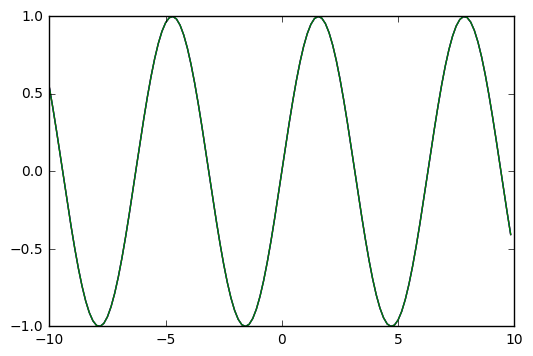

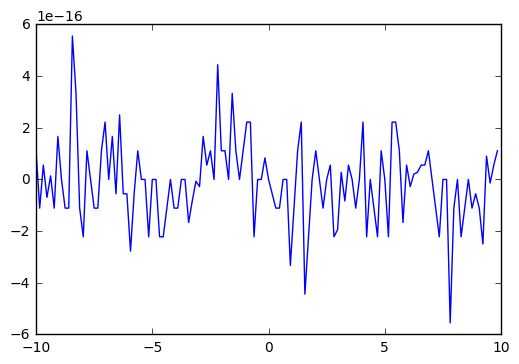

In [9]:
from numpy import sin
f1 = sin(x_space)
f3 = make_rad_ifft(make_rad_fft(f1, dx), dx) 
f4 = make_rad_fft(make_rad_ifft(f1, dx), dx)

plt.plot(x_space, f1.real, 'r')
plt.plot(x_space, f3.real)
plt.plot(x_space, f4.real)

plt.show()

plt.plot(x_space, f4.real - f3.real)
plt.show()

In [6]:
help(fft)

Help on package numpy.fft in numpy:

NAME
    numpy.fft

DESCRIPTION
    Discrete Fourier Transform (:mod:`numpy.fft`)
    
    .. currentmodule:: numpy.fft
    
    Standard FFTs
    -------------
    
    .. autosummary::
       :toctree: generated/
    
       fft       Discrete Fourier transform.
       ifft      Inverse discrete Fourier transform.
       fft2      Discrete Fourier transform in two dimensions.
       ifft2     Inverse discrete Fourier transform in two dimensions.
       fftn      Discrete Fourier transform in N-dimensions.
       ifftn     Inverse discrete Fourier transform in N dimensions.
    
    Real FFTs
    ---------
    
    .. autosummary::
       :toctree: generated/
    
       rfft      Real discrete Fourier transform.
       irfft     Inverse real discrete Fourier transform.
       rfft2     Real discrete Fourier transform in two dimensions.
       irfft2    Inverse real discrete Fourier transform in two dimensions.
       rfftn     Real discrete Fourie